In [1]:
import pandas as pd
import numpy as np

from data import Data

In [2]:
data = Data("project_train.csv")

data.df.loc[84, "energy"] = 0.734
data.df.loc[94, "loudness"] = -6.542

In [3]:
data.preprocess(shuffle=True, remove_duplicates=True,
                bound_bool=False, unbound_bool=True, 
                class_bool = True, binary_bool = False)

There were 6 duplicated elements in the dataset, and have been removed from the dataframe


In [4]:
test_data = Data("project_test.csv", test=True)
test_data.df = data.preprocess_new_data(test_data)

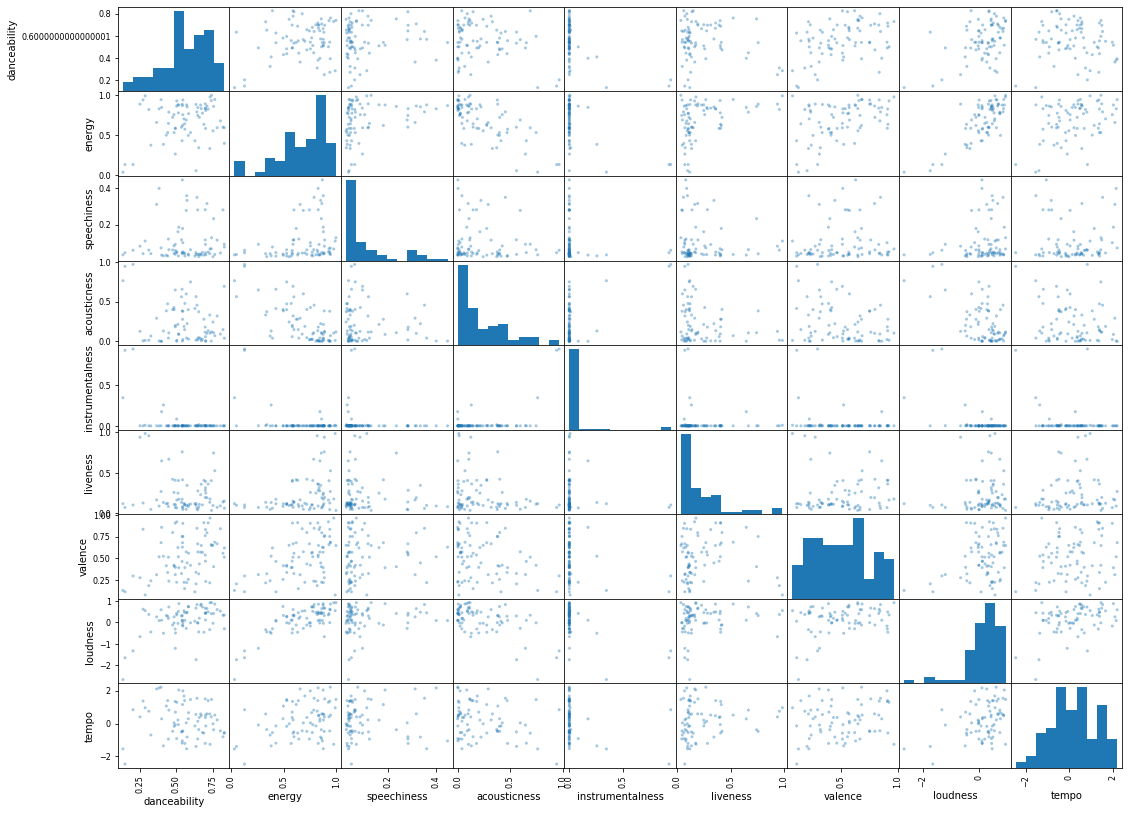

In [5]:
test_data.visualize()

In [6]:
from learning_machine import RandomForest

PREDICTIONS = np.zeros((75,))

for i in range(100):
    n_estimators = 150
    randomforest = RandomForest(data)
    randomforest._change_parameters(n_estimators)

    randomforest.fit_with_all_data(visualize=False, print_metrics=False)
    predictions = randomforest._predict(test_data.df)
    
    PREDICTIONS += predictions

In [7]:
print(PREDICTIONS/100)

[0.   0.   0.73 0.   1.   1.   0.06 1.   1.   1.   0.   0.   0.81 0.77
 0.24 1.   1.   0.   0.   0.   0.   0.86 0.1  0.63 1.   1.   0.   0.94
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.99 0.   1.   1.   0.1
 0.03 0.33 0.   0.88 0.   0.   0.   0.   0.91 0.   0.41 0.   0.   0.
 0.   0.   0.05 0.55 1.   0.   0.   0.   0.   0.   0.   0.01 0.   0.24
 0.97 0.   1.   1.   0.  ]


In [8]:
PREDICTIONS = PREDICTIONS / 100

PREDICTIONS = 1*(PREDICTIONS >= 0.5) + 0*(PREDICTIONS < 0.5)
print(PREDICTIONS)

[0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 0]


In [9]:
test_data.df["Labels"] = PREDICTIONS

In [10]:
test_data.df.to_csv("test_data_with_predictions.csv")

accuracy : 1.0
recall : 1.0
precision : 1.0
F1 : 1.0


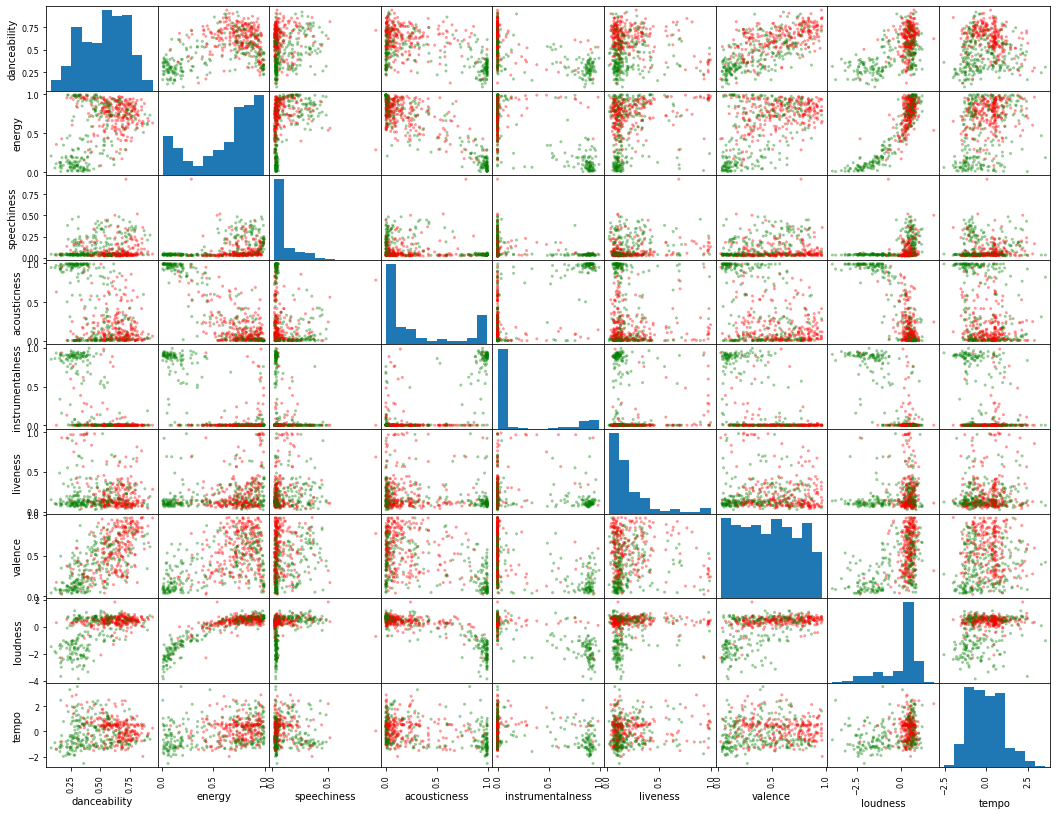

In [11]:
from learning_machine import RandomForest

n_estimators = 150
randomforest = RandomForest(data)
randomforest._change_parameters(n_estimators)

randomforest.fit_with_all_data()